In [ ]:
import time
#timestamp 기준점으로 부터 흐른 밀리초시간
print(time.time())#1595467415.6000268 <- 밀리초로 표현된 것이다.
print(time.localtime()) #지역에 맞춰서 구조체 형식으로 출력된다.
#시간은 문자열 취급을 한다.
#하지만 연산도 가능하다.
yesterday = time.localtime(time.time()-60*60*24)
print(yesterday) #mday가 22일로 변했다.
time.strftime('%y %m %d') #시간을 문자열 형식으로 출력하기 위해서 format을 넣어주었다.

In [ ]:
from datetime import date, time, datetime, timedelta
now = datetime.now()
print(now) #now에는 멤버변수로 year,month,day를 갖고있어서 각각 출력가능하다.
#__repr__이 오버라이딩 되어서 출력이 되는 것이다.
print(now.year, now.month, now.day)
now.timestamp() #저장되는 포멧은 timestamp, __repr__ 오버라이딩으로 출력이 되는것이다.
#원칙은 시간데이터 관리는 timestamp다.

In [ ]:
now_str=now.strftime('%y-%m-%d %H:%M:%S') #format , 문자열 생성
#now는 메모리에는 타임스템프로 저장되어있어 어떠한 표현방식으로도 사용할 수 있다.
print(now_str) #'2020-07-23 10:30:00' 문자열로 취급된다.
print(datetime.strptime(now_str,'%y-%m-%d %H:%M:%S')) #parsing (문자열->숫자열로 파싱하는것), strptime문자열 인식
#파싱 - 분해해서 인식한다.
delta = datetime(2015,1,7)-datetime(2010,6,24,8,15) #저장하고 있는 형식이 timedelta이다.
print("시간차 = ",delta, delta.days, delta.seconds) #delta.seconds 56700 초로표현했을때의 시간차
start = datetime(2010,1,7)
print(start-2*timedelta(12)) #timedelta는 변수가 아닌 함수, 매개변수 값을 day날짜수 이다.
#start - 24일
start+timedelta(hours=-5) #24시-5 = 19시

In [ ]:
#여기까지가 python core에서 관리하는 시간

In [ ]:
#pandas 시간이 정밀해서 nano초 까지 표현한다.
import pandas as pd
print(pd.datetime.now()) #지금의시간
print(pd.Timestamp('2020-07-01')) #날짜는 문자열 처리한다.
print(pd.Timestamp(1587687255,unit='s')) #s = 초
#시계열분석 : range, arange, date_range(시작점, 끝점, 주파수)
print(pd.date_range("11:00","13:30", freq="30min")) #30분 단위로 일정한 주기의 시간을 요소로 갖는 배열생성
#DatetimeIndex를 생성한다. ->시간인덱스로 들어가서 시계열분석에서 데이터를 주기별로 resampling하거나 검색용도로 사용한다.
#index, columns -> 행에 index를 시간으로 주는것이다.
#데이터가 없는경우, 사람이 계측을 해야하는데 건너뛸수도 있고 시간을 좀 달리할 수도 있다.
#이것을 리샘플링하여 정확하게 맞춰춰야 분석이 가능해진다.
print("시간으로", pd.date_range("11:00","13:30", freq="30min").time)
print(pd.date_range("11:00","13:30", freq="H")) #1시간 단위

In [ ]:
print(pd.to_datetime(pd.Series(['Jul 31 2009', '2010-01-10', None])))
#To_datetime은 있는 시간을 변환해서 인덱싱을 해준다.

In [ ]:
print(pd.to_datetime(['Jul 31 2009', '2010-01-10', None]))
#요놈도 데이터타입 인덱스를 만들어 놓은것

In [ ]:
print(pd.date_range('1/1/2010', periods=5)) #range를 발생하는데 생성갯수를 매개변수로 주었다.
print(pd.date_range('1/1/2017', periods=5, freq='M')) #마지막날(31일) 기준으로 생성해준다.(영업주기별로)
#freq를 주지않는경우 자동으로 Day로 들어간다 하루마다 발생

In [ ]:
print(pd.Timedelta(6, unit='h'))
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
td = pd.Series([pd.Timedelta(days=i) for i in range(3)])
df = pd.DataFrame(dict(A=s,B=td))
df['C'] = df['A']+df['B']
df['D'] = df['C']+df['B']
print(df)

In [ ]:
#R에서는 nan, None을 따로 분리했다.
#파이썬에서는 동일하게 취급한다.
import numpy as np
data = pd.Series([1,np.nan,"hint",None]) #None 객체가 인스턴스 안된것
print(data.isnull())
data[data.notnull()] #디텍트

In [ ]:
data.dropna() #null값 제거

In [ ]:
df = pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])
df.dropna() #디폴트는 행이다.

In [ ]:
df.dropna(axis='columns') #컬럼으로 기준을 주었다.

In [ ]:
df[3] = np.nan #3번째 열에 na를 모두 대입하였다.
df

In [ ]:
df.dropna(axis='columns', how='all') #how='all' 모두가 null인 경우에만 삭제하라

In [ ]:
df.dropna(axis='rows', thresh=3) # 경계선을 기준으로 

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))

In [ ]:
data.fillna(0)

In [ ]:
data.fillna(method = 'ffill') # forward 전진해서

In [ ]:
data.fillna(method = 'bfill') # backward 이전 것으로 채움

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
df = pd.read_csv('pima.csv', header=None)
msno.matrix(df)
plt.show()

In [ ]:
msno.bar(df)

In [ ]:
df.dropna()

In [ ]:
df = pd.DataFrame({'value' : np.random.randint(0, 100, 20)}) #0~100 
print(df)
labels = ["{0}-{1}".format(i, i+9) for i in range(0, 100, 10)]
print(labels)
#range(0,105,10)->[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 경계선 값을 주고 범주화
df['group'] = pd.cut(df.value, range(0,109,10), right = False, labels = labels) #범주화로 10가지 경우의수로 바뀐다.
#100안되고 101~110까지 가능 111안됨
#겅계선 값을 주고 범주화 한다. (열이 하나더 생성되었다.)
df.head(10)

In [ ]:
raw_cut = pd.Categorical(['a','b','c','d'], categories=['b','c','d'], ordered=False)
raw_cut
#범주의 유형으로 정의 되어졌다. Categorical
#카테고리로 데이터를 재표현해주었다.

In [ ]:
from pandas.api.types import CategoricalDtype
s = pd.Series(["a","b","c","d"])
s_t = CategoricalDtype(categories=['b','c','d'], ordered=True)
#s_cat = s.astype("category", CategoricalDtype(categories=['b','c','d'], ordered=True))
s_cat = s.astype(s_t)
print(s_cat.dtype)
s_t #범주를 확인해보면 카테고리로 지정한 세가지만 출력되는것을 알 수있다.

In [ ]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
print(df)
print(pd.get_dummies(df['key'])) #원핫인코딩(범주갯수만큼 열이 생성된다.) <- 반드시 해주어야 한다.
#3가지 종류의 on off 회귀에서 중요한 역할을 한다.
#회귀는 연속형 숫자의 분석이기 때문에 범주형인 경우 잘못된 회귀결과가 나온다. 
#0일때 회귀분석, 1일때 회귀분석하여 결과를 두번본다.
#범주형인경우 범주의 갯수만큼 회귀분석을 하게된다.
dummies = pd.get_dummies(df['key'],prefix='key') #열이름 주어서 생성(접두사를 달아준 것이다.)
#트리분석으로 데이터 구조를 확인하게된다.
print(dummies)
df_with_dummy = df[['data1']].join(dummies) #기존 데이터에 조인하였다.
print(df_with_dummy)

In [8]:
import pandas as pd
import numpy as np
arrays = [['병아리','병아리','곰돌이','곰돌이','펭수','펭수','새싹반','새싹반'],['one','two','one','two','one','two','one','two']]
print(arrays)
tuples = list(zip(*arrays)) #리스트로 쪼개져 2개가 된다. #zip = 같은 인덱스의 요소끼리 튜플로 묶어진다.
print(tuples)
#멀티인덱스(다중인덱스)
index = pd.MultiIndex.from_tuples(tuples, names=['first','second']) #열이름(레벨이름)
print(index)
s = pd.Series(np.random.randn(8), index=index) #데이터는 한 열이고 인덱스가 2개인 데이터가 된다. 
print(s)

[['병아리', '병아리', '곰돌이', '곰돌이', '펭수', '펭수', '새싹반', '새싹반'], ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
[('병아리', 'one'), ('병아리', 'two'), ('곰돌이', 'one'), ('곰돌이', 'two'), ('펭수', 'one'), ('펭수', 'two'), ('새싹반', 'one'), ('새싹반', 'two')]
MultiIndex([('병아리', 'one'),
            ('병아리', 'two'),
            ('곰돌이', 'one'),
            ('곰돌이', 'two'),
            ( '펭수', 'one'),
            ( '펭수', 'two'),
            ('새싹반', 'one'),
            ('새싹반', 'two')],
           names=['first', 'second'])
first  second
병아리    one       1.665568
       two      -0.195128
곰돌이    one       0.491841
       two       0.583078
펭수     one      -0.025667
       two       0.942927
새싹반    one       1.637121
       two       0.180694
dtype: float64


In [11]:
frame = pd.DataFrame(np.arange(12).reshape(4,3), index = [['1반','1반','2반','2반'],[1,2,1,2]],  #2차원배열 -> 2개의 인덱스
                     columns=[['서울권','지방권','지방권'],['서울','대전','대구']])
print(frame) #4*3 =12개의 값

     서울권 지방권    
      서울  대전  대구
1반 1   0   1   2
   2   3   4   5
2반 1   6   7   8
   2   9  10  11


In [ ]:
frame.index.names = ['key1','key2']
frame.columns.names=['state','color']
print(frame)
print(frame['지방권'])
print(frame['지방권']['대전'])
print(frame.swaplevel('key1','key2')) #두개를 서로 바꿔서 출력하라 = swaplevel(0,1)
print(frame.sort_index(1)) #대구<->대전(서울,대구,대전)
print(frame.swaplevel(0,1).sort_index(0)) #key2기준으로 sorting?

In [21]:
frame = pd.DataFrame({'a':range(7), 'b':range(7,0,-1), 'c':['one','one','one','two','two','two','two'], 'd':[0,1,2,0,1,2,3]})
print(frame)
frame2 = frame.set_index('d','c') #데이터로부터 인덱스로 변환된다.
#데이터내에 범주형데이터를 인덱스로 지정할 수 있다.
print(frame2)
frame2.reset_index() #레벨이 제거된다. -> 수평화 되어진다.
print("리셑인덱스", frame2)
frame_reindex = frame.reindex(index=[0,2,5], columns=['a','b'])
print(frame_reindex) #원하는 데이터만 선택한다.
frame_reindex.describe()
#인덱스, iloc, loc, 다중인덱스

   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3
   a  b    c
d           
0  0  7  one
1  1  6  one
2  2  5  one
0  3  4  two
1  4  3  two
2  5  2  two
3  6  1  two
   a  b    c
d           
0  0  7  one
1  1  6  one
2  2  5  one
0  3  4  two
1  4  3  two
2  5  2  two
3  6  1  two
   a  b
0  0  7
2  2  5
5  5  2


,a,b
count,3.000000,3.000000
mean,2.333333,4.666667
std,2.516611,2.516611
min,0.000000,2.000000
25%,1.000000,3.500000
50%,2.000000,5.000000
75%,3.500000,6.000000
max,5.000000,7.000000


In [30]:
import glob #파일명 리스트를 읽어옴
import os
filePathList = glob.glob("./same__files/*.csv") #파일이름들을 리딩 -> csv라고 생긴놈 다 불러와라
print(filePathList)
temp = os.path.basename(filePathList[0]) #맨밑에 1763.csv요놈만 읽어오는것 basename
print(temp)
temp=os.path.splitext(temp)[0] #1763 csv 중 0번 인덱스로 1763
print(temp)
os.path.splitext(temp)
#파일명을 읽어온것

['./same__files\\1763.csv', './same__files\\1764.csv', './same__files\\1765.csv', './same__files\\1766.csv', './same__files\\1767.csv', './same__files\\1768.csv', './same__files\\1769.csv', './same__files\\1770.csv', './same__files\\1771.csv', './same__files\\1772.csv']
1763.csv
1763


('1763', '')

In [38]:
#데이터를 읽어오는것
for i in range(0, len(filePathList)):
    temp = os.path.basename(filePathList[i])
    temp = os.path.splitext(temp)[0]
    vars()['data_'+str(temp)] = pd.read_csv(filePathList[i]) #vars = 메모리에서 작동하고 있는 변수들을 실시간으로 생성하고 있다.
    # = 변수에 메모리를 생성하고 있다.
    #str -> string(temp) = 1763
    #파이썬도 변수를 딕셔러니(키 데이터 형식으로)로 관리한다.
    #읽어와서 변수에 할당하는 것이 아니라 var(변수들을 컨트롤하는놈)라고 하는놈에 직접 키 데이터 형식으로 만들어 주었다.
    #실시간으로 변수추가 가능 키-데이터 형식으로 메모리에서 변수를 추가하고 있는 것이다.
print(data_1763.head(3))
print(data_1764.head(3))
print(data_1772.head(3))
#많은 데이터(여러파일)을 로딩해야 할때가 있다.
#그때 읽어들이고 var를 이용해 변수를 생성하여 데이터를 가진 주소를 부여한다.

   ITE00100554  17630101  TMAX  -36  Unnamed: 4 Unnamed: 5  E  Unnamed: 7
0  ITE00100554  17630101  TMIN  -50         NaN        NaN  E         NaN
1  ITE00100554  17630102  TMAX  -26         NaN        NaN  E         NaN
2  ITE00100554  17630102  TMIN  -40         NaN        NaN  E         NaN
   ITE00100554  17640101  TMAX  64  Unnamed: 4 Unnamed: 5  E  Unnamed: 7
0  ITE00100554  17640101  TMIN  44         NaN        NaN  E         NaN
1  ITE00100554  17640102  TMAX  46         NaN        NaN  E         NaN
2  ITE00100554  17640102  TMIN  26         NaN        NaN  E         NaN
   ITE00100554  17720101  TMAX  51  Unnamed: 4 Unnamed: 5  E  Unnamed: 7
0  ITE00100554  17720101  TMIN  31         NaN        NaN  E         NaN
1  ITE00100554  17720102  TMAX  48         NaN        NaN  E         NaN
2  ITE00100554  17720102  TMIN  18         NaN        NaN  E         NaN


In [41]:
import FinanceDataReader as fdr
fdr.__version__ #version 항상 앞뒤에 __

'0.9.6'

In [43]:
df_krx = fdr.StockListing('KRX')
df_krx.head() #한국거래소 상장종목들에 대한 정보
#심볼번호로 종목에 접근

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [45]:
df = fdr.DataReader('095570', '2020') #이종목에 대한 2020년도의 정보 리턴
#개장가 고가 저가 종가 거래수 변화율 의 정보를 가져온다.
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,4900,5140,4895,5050,210107,0.016097
2020-01-03,5050,5150,5030,5100,128274,0.009901
2020-01-06,5080,5080,4950,5030,162087,-0.013725
2020-01-07,5030,5100,4965,5030,42008,0.000000
2020-01-08,5050,5060,4735,4935,110827,-0.018887


In [46]:
len(df) #140일의 장이 열렸다. (1월1일부터 현재까지)

140

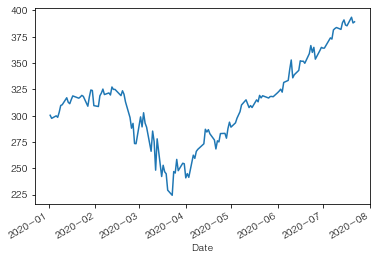

In [47]:
df = fdr.DataReader('AAPL', '2020') #AMZN 아마존 AAPL애플
df.Close.plot() #종가 plot로 그려라

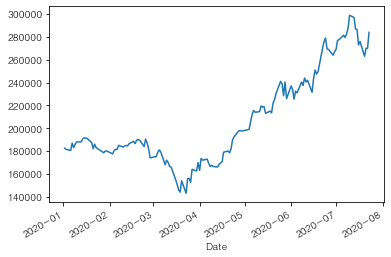

In [48]:
df = fdr.DataReader('035420', '2020') #네이버
df.Close.plot() 

In [96]:
df = pd.read_csv("sales.csv")
df.head()
#CN에 float->int, 수치에 ,와$,%를 제거하여야 연산이 가능하다., 범주형 0,1로 변환

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [97]:
df["Customer Number"]= df["Customer Number"].astype('int')
print(df.dtypes) #object = 문자열
df.head() #float->int

Customer Number     int32
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [98]:
df['2017'] = df['2017'].map(lambda x : x.replace('$',''))
df['2017'] = df['2017'].map(lambda x : x.replace(',',''))
df['2017']= df['2017'].astype(float)
df['2016'] = df['2016'].map(lambda x : x.replace('$',''))
df['2016'] = df['2016'].map(lambda x : x.replace(',',''))
df['2016']= df['2016'].astype(float)
df.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,N


In [99]:
df['Active'] = df['Active']=='Y' 
#true일 경우만 넣어주면 1 아니면 0으로 맵핑된다.
df.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,False


In [100]:
def convent_percent(val):
    new_val = val.replace('%','')
    return float(new_val)/100 
#퍼센트였기 때문에 100나눠줌

In [101]:
df['Percent Growth'] = df['Percent Growth'].map(convent_percent)
df.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,False


In [102]:
#문제 $를 뗴어내는 것을 함수로 구현해 보시오
def convert_currency(val):
    new_val = val.replace('$','').replace(',','') #함수체인잉
    return float(new_val)

In [104]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce')
#에러옵션3가지 = raise강제로 에러발생시켜라, coerce na처리해라, ignore 무시해라
df.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


In [105]:
df.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object

In [106]:
df_2 = pd.read_csv("sales.csv",dtype={'Customer Number':'int'}, 
                   converters={'2016':convert_currency, '2017':convert_currency, 'Percent Growth':convent_percent, 
                              'Jan Units':lambda x:pd.to_numeric(x, errors='coerce'), 
                              'Active': lambda x : np.where(x=='Y',True,False)})
#한번에 분석이 가능한 데이터 형식으로 바꾼다.
#데이터 타입조절
df_2

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


In [107]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                  'data':range(6)}, columns=['key','data'])
df.groupby('key') #범주형 시리즈를 중심하고 그룹핑하여 다른 데이터의 집계연산을 내기위해서 
#그룹핑을 하면 아무일도 잇어나지 않는다 그룹핑 객체가 생성된다.
#여기에다 집계함수를 사용하여야 한다.

In [108]:
df.groupby('key').sum() #key를 중심하고 sum을 하게된다.

,data
key,
A,3
B,5
C,7


In [109]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [110]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [111]:
planets['method'].unique()
#메소드 자리에 오는 놈들을 중복을배제하고 경우의 수만 보여달라

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [112]:
len(planets['method'].unique()) #10개의 그룹으로 집계가능

10

In [113]:
planets.groupby('method')['orbital_period'].median() #범주별로 중위수가 구해진다.
#mean, max 등 

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [114]:
planets.groupby('method')['year'].describe() #그룹별로 year에 대한 정보 표시

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [115]:
rng = np.random.RandomState(0)

In [122]:
df = pd.DataFrame({'key1':['영업부','영업부','관리부','관리부','관리부'], 'key2':['남','여','남','여','남'],
                  'data1':np.random.randn(5), 'data2':np.random.randn(5)}) #4개의 컬럼수(key = 변수명 같이 된다.)
#인덱스는 자동으로 생성되었다. rangeIndex가 만들어진다.
print(df)
print(df.stack()) #오른쪽에 데이터만 남고 왼쪽에 키들이 모인다.

  key1 key2     data1     data2
0  영업부    남 -0.588002 -0.298901
1  영업부    여 -0.987334  0.931514
2  관리부    남  0.986197  0.756929
3  관리부    여 -0.305856  0.192265
4  관리부    남  0.415669 -1.045260
0  key1          영업부
   key2            남
   data1   -0.588002
   data2   -0.298901
1  key1          영업부
   key2            여
   data1   -0.987334
   data2    0.931514
2  key1          관리부
   key2            남
   data1    0.986197
   data2    0.756929
3  key1          관리부
   key2            여
   data1   -0.305856
   data2    0.192265
4  key1          관리부
   key2            남
   data1    0.415669
   data2    -1.04526
dtype: object


In [119]:
grouped = df.groupby(df['key1']) #key1 - 관리부/영업부
#한 시리즈를 중심하고 그룹핑을 데이터프레임 전체에 대하여 실행한다.
print(grouped)
grouped.mean()

,data1,data2
key1,,
관리부,-0.881616,1.164143
영업부,0.367218,0.589121


In [123]:
means=df['data1'].groupby([df['key1'],df['key2']]).mean()
print(means) #stack 한것과 같아졌다. 다계층으로 그룹핑하였기 떄문에
means.unstack() #보기쉽게 펴주는게 unstack이다.

key1  key2
관리부   남       0.700933
      여      -0.305856
영업부   남      -0.588002
      여      -0.987334
Name: data1, dtype: float64


key2,남,여
key1,,
관리부,0.700933,-0.305856
영업부,-0.588002,-0.987334


In [125]:
# cross tab (교차분석표) - 두개의 시리즈가 필요하다.
# groupby -하나의 시리즈만 필요
# value_count (도수분포표-하나의 시리즈를 대상으로 범주의 갯수가 몇개인지) <- R에서는 table이였음
df = pd.DataFrame({'A':['일반','일반','특수','예외']*6, 'B':['서울','대구','부산']*8, 
                   'C':['건조','건조','건조','우기','우기','우기']*4, 'D':np.random.randn(24), 'E':np.random.randn(24)})
print(df)

     A   B   C         D         E
0   일반  서울  건조 -1.884604  0.792357
1   일반  대구  건조  1.290013 -0.111934
2   특수  부산  건조  0.832466 -0.194328
3   예외  서울  우기  0.079007 -0.318704
4   일반  대구  우기 -2.455296 -1.060900
5   일반  부산  우기  1.228710 -2.016901
6   특수  서울  건조  1.093070 -1.664062
7   예외  대구  건조  0.132414  0.776458
8   일반  부산  건조  1.566999 -2.936541
9   일반  서울  우기 -0.935427 -1.150302
10  특수  대구  우기  1.748089  0.056554
11  예외  부산  우기 -0.116386  1.090458
12  일반  서울  건조 -0.263586 -0.267511
13  일반  대구  건조  0.109453 -0.036469
14  특수  부산  건조 -0.520201 -0.204929
15  예외  서울  우기  0.670875  1.699856
16  일반  대구  우기  0.261506 -1.074024
17  일반  부산  우기  1.443049 -0.328323
18  특수  서울  건조 -0.521831  0.006896
19  예외  대구  건조 -1.501356  2.026530
20  일반  부산  건조 -0.134719  1.340654
21  일반  서울  우기  0.920767  0.905260
22  특수  대구  우기 -0.264555 -1.015587
23  예외  부산  우기  0.411493 -0.196842


In [126]:
pd.crosstab(df.A,df.B) #3*3=9개(전체경우의수)

B,대구,부산,서울
A,,,
예외,2,2,2
일반,4,4,4
특수,2,2,2


In [129]:
pd.crosstab(df.A,df.C, margins=True) #margins=True 합계를 구해준다.

C,건조,우기,All
A,,,
예외,2,4,6
일반,6,6,12
특수,4,2,6
All,12,12,24


In [130]:
pd.crosstab([df.A,df.B], df.C, margins=True)
#어떤 범주로 데이터를 볼것인가

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [134]:
#pivot table - 데이터를 변경하지 않고 3개의 구조를 한눈에 볼 때 사용
df = pd.DataFrame({'foo':['one','one-1','two','two'], 'bar':['A','A','B','C'], 'baz':[1,2,3,4]})
print(df)
df.pivot(index='foo',columns='bar',values='baz') #데이터에 변화가 없다.
#(행범주,열범주,데이터값) - 있는데이터가 그대로 적힌다.

     foo bar  baz
0    one   A    1
1  one-1   A    2
2    two   B    3
3    two   C    4


bar,A,B,C
foo,,,
one,1.0,NaN,NaN
one-1,2.0,NaN,NaN
two,NaN,3.0,4.0


In [137]:
df = pd.read_excel('sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [138]:
df.dtypes

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

In [141]:
df['Status']=df['Status'].astype('category')
df['Status'].cat.set_categories(['won','pending','presented','declined'], inplace=True)
pd.pivot_table(df, index=['Name']) #인덱스를 이름으로 주었다.(행이름), 컬럼이 지정되지 않으면 전체 숫자데이터에 적용된다.
#숫자형 데이터만 담고있다.

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [142]:
pd.pivot_table(df, index=["Name"],columns=["Manager"]) #행,열 인덱스를 주었다.

Account                      Price  \
Manager                      Debra Henley Fred Anderson Debra Henley   
Name                                                                   
Barton LLC                       740150.0           NaN      35000.0   
Fritsch, Russel and Anderson     737550.0           NaN      35000.0   
Herman LLC                            NaN      141962.0          NaN   
Jerde-Hilpert                    412290.0           NaN       5000.0   
Kassulke, Ondricka and Metz           NaN      307599.0          NaN   
Keeling LLC                           NaN      688981.0          NaN   
Kiehn-Spinka                     146832.0           NaN      65000.0   
Koepp Ltd                             NaN      729833.0          NaN   
Kulas Inc                        218895.0           NaN      25000.0   
Purdy-Kunde                           NaN      163416.0          NaN   
Stokes LLC                            NaN      239344.0          NaN   
Trantow-Barrows                  714466.0           NaN      15000.0   

                                               Quantity                
Manager                      Fred Anderson Debra Henley Fred Anderson  
Name                                                                   
Barton LLC                             NaN     1.000000           NaN  
Fritsch, Russel and Anderson           NaN     1.000000           NaN  
Herman LLC                         65000.0          NaN           2.0  
Jerde-Hilpert                          NaN     2.000000           NaN  
Kassulke, Ondricka and Metz         7000.0          NaN           3.0  
Keeling LLC                       100000.0          NaN           5.0  
Kiehn-Spinka                           NaN     2.000000           NaN  
Koepp Ltd                          35000.0          NaN           2.0  
Kulas Inc                              NaN     1.500000           NaN  
Purdy-Kunde                        30000.0          NaN           1.0  
Stokes LLC                          7500.0          NaN           1.0  
Trantow-Barrows                        NaN     1.333333           NaN

In [143]:
pd.pivot_table(df, index=['Name'],columns=['Manager'],values=["Price"])

Price              
Manager                      Debra Henley Fred Anderson
Name                                                   
Barton LLC                        35000.0           NaN
Fritsch, Russel and Anderson      35000.0           NaN
Herman LLC                            NaN       65000.0
Jerde-Hilpert                      5000.0           NaN
Kassulke, Ondricka and Metz           NaN        7000.0
Keeling LLC                           NaN      100000.0
Kiehn-Spinka                      65000.0           NaN
Koepp Ltd                             NaN       35000.0
Kulas Inc                         25000.0           NaN
Purdy-Kunde                           NaN       30000.0
Stokes LLC                            NaN        7500.0
Trantow-Barrows                   15000.0           NaN

In [145]:
pd.pivot_table(df, index=['Manager','Rep']) #인덱스를 두개를 줄 수 있다.

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [147]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [148]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=[np.sum, len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [149]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=[np.sum, len], fill_value=0)
#na값이 있어서 계산하는 경우 na값으로 리턴되기 때문에 fill_value로 채워준다.

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [5]:
# 문제
# dataset.csv
#gender 열과 resident 열을 출력하시오
#price는 평균, age는 합계를 계산하시오.
import pandas as pd
df = pd.read_csv("dataset.csv")
col_rename = {'   gender':'gender','               job':'job',
              '             age':'age','         position':'position','           price':'price'}
df_rename = df.rename(columns=col_rename)
print(df_rename.dtypes)
print(df_rename['resident'])
print(df_rename['gender'])
df_rename['age'] = pd.to_numeric(df_rename['age'], errors='coerce')
df_rename['price'] = pd.to_numeric(df_rename['price'], errors='coerce')
print(df_rename['age'].sum())
print(df_rename['price'].mean())

resident    object
gender       int64
job         object
age         object
position    object
price       object
survey       int64
dtype: object
0        1
1        2
2         
3        4
4        5
      ... 
295      1
296      3
297      4
298      3
299      1
Name: resident, Length: 300, dtype: object
0      1
1      1
2      1
3      2
4      1
      ..
295    5
296    1
297    1
298    0
299    1
Name: gender, Length: 300, dtype: int64
11651.0
8.75148148148148


In [3]:
print(df_rename.dtypes)
print(df['resident'])
print(df['   gender'])

resident    object
gender       int64
job         object
age         object
position    object
price       object
survey       int64
dtype: object
0        1
1        2
2         
3        4
4        5
      ... 
295      1
296      3
297      4
298      3
299      1
Name: resident, Length: 300, dtype: object
0      1
1      1
2      1
3      2
4      1
      ..
295    5
296    1
297    1
298    0
299    1
Name:    gender, Length: 300, dtype: int64


In [169]:
df['             age'] = pd.to_numeric(df['             age'], errors='coerce')
df['           price'] = pd.to_numeric(df['           price'], errors='coerce')

In [171]:
print(df['             age'].sum())
print(df['           price'].mean())

11651.0
8.75148148148148


In [172]:
df.head()

,resident,gender,job,age,position,price,survey
0,1,1,1,26.0,2,5.1,1
1,2,1,2,54.0,5,4.2,2
2,,1,2,41.0,4,4.7,4
3,4,2,,45.0,4,3.5,2
4,5,1,3,62.0,5,5.0,1


In [7]:
df = pd.read_csv("dataset.csv")
df.head()

df.dtypes

#공백제거
df1 = df.columns.str.replace(' ', '')
